<center><h1> Unsupervised Learning Project</h1></center>

In [34]:
import pandas as pd

flights = pd.read_csv('flights.csv', low_memory=False)
before_shape = flights.shape # this is referrenced later following the data cleaning

### Data Description and Cleaning

In [35]:
# create dict to store and reference data desc
META = {
    'Data_types':flights.dtypes,
    'Null_values':flights.isnull().sum(),
    'percent_missing': (flights.isnull().sum() / flights.shape[0]) * 100
}
meta = pd.DataFrame.from_dict(META)
meta.sort_values(by='percent_missing', ascending = False).head()

,Data_types,Null_values,percent_missing
CANCELLATION_REASON,object,5729195,98.455357
WEATHER_DELAY,float64,4755640,81.724960
LATE_AIRCRAFT_DELAY,float64,4755640,81.724960
AIRLINE_DELAY,float64,4755640,81.724960
SECURITY_DELAY,float64,4755640,81.724960


In [36]:
flights.drop([*meta[meta['percent_missing'] > 20].index], axis = 1, inplace=True) # drop cols that had more than 20 percent missing
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0


In [37]:
flights['DATE'] = pd.to_datetime(flights[['YEAR', 'MONTH', 'DAY']]) # create single column for date
flights.drop(['YEAR', 'MONTH', 'DAY'], axis = 1, inplace = True)
flights.head()

,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,...,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,DATE
0,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,...,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,2015-01-01
1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,...,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,2015-01-01
2,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,...,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,2015-01-01
3,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,...,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,2015-01-01
4,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,...,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,2015-01-01


In [38]:
# drop remaining rows containing nulls (~ < 2 percent missing)
flights.dropna(axis = 0, inplace = True)

In [39]:
flights.isnull().sum() # check for any remaining nulls

DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
DATE                   0
dtype: int64

### Checking unique values and variation within columns

In [40]:
# examine columns for variation in values
print('---Column contents---')
cols_to_drop = []

for column in flights.columns.values:
    if len(flights[column].unique()) > 2:
        print(column, ' contains ',
              len(flights[column].unique()), ' unique values')
    elif len(flights[column].unique()) == 2:
        print(column, ' may contain binary values')
    else:
        cols_to_drop.append(column)
        print('\n', column, ' contains no unique value(s)')
        print('Dropping ', column, ' from data...')

# columns DIVERTED and CANCELLED contain all zeros, therefore we drop them
flights.drop(cols_to_drop, axis = 1, inplace=True)

---Column contents---
DAY_OF_WEEK  contains  7  unique values
AIRLINE  contains  14  unique values
FLIGHT_NUMBER  contains  6946  unique values
TAIL_NUMBER  contains  4896  unique values
ORIGIN_AIRPORT  contains  628  unique values
DESTINATION_AIRPORT  contains  629  unique values
SCHEDULED_DEPARTURE  contains  1320  unique values
DEPARTURE_TIME  contains  1440  unique values
DEPARTURE_DELAY  contains  1212  unique values
TAXI_OUT  contains  184  unique values
WHEELS_OFF  contains  1440  unique values
SCHEDULED_TIME  contains  549  unique values
ELAPSED_TIME  contains  712  unique values
AIR_TIME  contains  675  unique values
DISTANCE  contains  1350  unique values
WHEELS_ON  contains  1440  unique values
TAXI_IN  contains  184  unique values
SCHEDULED_ARRIVAL  contains  1434  unique values
ARRIVAL_TIME  contains  1440  unique values
ARRIVAL_DELAY  contains  1240  unique values

 DIVERTED  contains no unique value(s)
Dropping  DIVERTED  from data...

 CANCELLED  contains no unique valu

In [41]:
# print dimensions
s = "------({} cleaning)-----\nRows: {}\nColumns: {}\n"
print(s.format('Before', before_shape[0], before_shape[1]), '\n',
      s.format('After', flights.shape[0], flights.shape[1]))

------(Before cleaning)-----
Rows: 5819079
Columns: 31
 
 ------(After cleaning)-----
Rows: 5714008
Columns: 21



### Replacing acronyms for airport and state for readability later on

In [42]:
# import airlines so that we can label them in exchange for IATA_CODE
airlines = pd.read_csv('airlines.csv')
airlines = dict(airlines.values)

flights['AIRLINE'] = flights['AIRLINE'].apply(lambda x: airlines.get(x))

airlines = flights['AIRLINE'].unique() # finally assign list of full names

In [43]:
# import airport information to examing geographical relationships that may exist
airports = pd.read_csv('airports.csv')

In [44]:
# replace state codes with names for later reference
STATES = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [45]:
# replace state codes with state names
airports['STATE'] = airports['STATE'].apply(lambda x:STATES.get(x))
airports['STATE'].unique()

array(['Pennsylvania', 'Texas', 'New Mexico', 'South Dakota', 'Georgia',
       'Massachusetts', 'California', 'New Jersey', 'Alaska', 'Louisiana',
       'New York', 'Iowa', 'Michigan', 'Colorado', 'Wisconsin',
       'North Carolina', 'Connecticut', 'Maine', 'Alabama', 'Montana',
       'North Dakota', 'Minnesota', 'Washington', 'Illinois', 'Tennessee',
       'Idaho', 'Puerto Rico', 'Vermont', 'Maryland', 'South Carolina',
       'Ohio', 'Utah', 'Virginia', 'Wyoming', 'Missouri', 'West Virginia',
       'Kentucky', 'Florida', 'Nevada', 'Oregon', 'Indiana', 'Arizona',
       'Arkansas', 'Kansas', 'Mississippi', 'Nebraska', 'Guam', 'Hawaii',
       'Delaware', 'Oklahoma', 'New Hampshire', 'American Samoa',
       'Rhode Island', 'Virgin Islands'], dtype=object)

In [46]:
CODE_STATE = dict(airports[['IATA_CODE', 'STATE']].values)

In [47]:
flights['ORIGIN_STATE'] = flights['ORIGIN_AIRPORT'].apply(lambda x: CODE_STATE.get(x))

In [48]:
flights['DESTINATION_STATE'] = flights['DESTINATION_AIRPORT'].apply(lambda x: CODE_STATE.get(x))

In [49]:
# output updated object type data in flights
flights.select_dtypes('object').head()

,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,ORIGIN_STATE,DESTINATION_STATE
0,Alaska Airlines Inc.,N407AS,ANC,SEA,Alaska,Washington
1,American Airlines Inc.,N3KUAA,LAX,PBI,California,Florida
2,US Airways Inc.,N171US,SFO,CLT,California,North Carolina
3,American Airlines Inc.,N3HYAA,LAX,MIA,California,Florida
4,Alaska Airlines Inc.,N527AS,SEA,ANC,Washington,Alaska


In [50]:
# We can drop these columns since they're just IDs within the data, not a metric
flights.drop(['FLIGHT_NUMBER', 'TAIL_NUMBER'], axis = 1, inplace=True)
flights.head()

,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,...,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DATE,ORIGIN_STATE,DESTINATION_STATE
0,4,Alaska Airlines Inc.,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,...,169.0,1448,404.0,4.0,430,408.0,-22.0,2015-01-01,Alaska,Washington
1,4,American Airlines Inc.,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,...,263.0,2330,737.0,4.0,750,741.0,-9.0,2015-01-01,California,Florida
2,4,US Airways Inc.,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,...,266.0,2296,800.0,11.0,806,811.0,5.0,2015-01-01,California,North Carolina
3,4,American Airlines Inc.,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,...,258.0,2342,748.0,8.0,805,756.0,-9.0,2015-01-01,California,Florida
4,4,Alaska Airlines Inc.,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,...,199.0,1448,254.0,5.0,320,259.0,-21.0,2015-01-01,Washington,Alaska


<h3> Examining the distribution of data <i>before</i> <b>scaling</b> and <b>encoding</b></h3>

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt

flights.head()

,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,...,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DATE,ORIGIN_STATE,DESTINATION_STATE
0,4,Alaska Airlines Inc.,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,...,169.0,1448,404.0,4.0,430,408.0,-22.0,2015-01-01,Alaska,Washington
1,4,American Airlines Inc.,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,...,263.0,2330,737.0,4.0,750,741.0,-9.0,2015-01-01,California,Florida
2,4,US Airways Inc.,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,...,266.0,2296,800.0,11.0,806,811.0,5.0,2015-01-01,California,North Carolina
3,4,American Airlines Inc.,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,...,258.0,2342,748.0,8.0,805,756.0,-9.0,2015-01-01,California,Florida
4,4,Alaska Airlines Inc.,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,...,199.0,1448,254.0,5.0,320,259.0,-21.0,2015-01-01,Washington,Alaska


<p>An interactive data visualization tool is embedded below. Random samples of size n = 100 are drawn from the data frame since it's contains over 5 x 10<sup>6</sup> entries</p>

In [58]:
# to use run pip install pivottablejs
from pivottablejs import pivot_ui

In [59]:
pivot_ui(flights.sample(n = 100)) # count by AIRLINE shown by default but adjustments can be made using UI 

In [63]:
airline = pd.get_dummies(flights['AIRLINE'])
airline.head()

,Alaska Airlines Inc.,American Airlines Inc.,American Eagle Airlines Inc.,Atlantic Southeast Airlines,Delta Air Lines Inc.,Frontier Airlines Inc.,Hawaiian Airlines Inc.,JetBlue Airways,Skywest Airlines Inc.,Southwest Airlines Co.,Spirit Air Lines,US Airways Inc.,United Air Lines Inc.,Virgin America
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [64]:
# cols to drop later for ML algorithms
non_numeric = [*flights.select_dtypes('object').columns]
non_numeric.append('DATE')
non_numeric.append('DAY_OF_WEEK')
non_numeric

['AIRLINE',
 'ORIGIN_AIRPORT',
 'DESTINATION_AIRPORT',
 'ORIGIN_STATE',
 'DESTINATION_STATE',
 'DATE',
 'DAY_OF_WEEK']

In [67]:
# combine encoded with original df with non_numeric dropped
from sklearn.preprocessing import StandardScaler

flight_airlines = flights.drop(non_numeric, axis = 1)
flight_airlines = StandardScaler().fit_transform(flight_airlines)

In [100]:
scaled = pd.DataFrame(flight_airlines, columns = flights.drop(non_numeric, axis = 1).columns)
inputs = pd.concat([airline.reset_index(drop=True), scaled.reset_index(drop=True)], axis = 1)

In [101]:
inputs.head()

,Alaska Airlines Inc.,American Airlines Inc.,American Eagle Airlines Inc.,Atlantic Southeast Airlines,Delta Air Lines Inc.,Frontier Airlines Inc.,Hawaiian Airlines Inc.,JetBlue Airways,Skywest Airlines Inc.,Southwest Airlines Co.,...,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
0,1,0,0,0,0,0,0,0,0,0,...,-2.694850,0.837906,0.767996,0.768209,1.024449,-2.045189,-0.610268,-2.097425,-2.031233,-0.672426
1,0,1,0,0,0,0,0,0,0,0,...,-2.696858,1.833737,1.913378,2.069593,2.473529,-1.407097,-0.610268,-1.466138,-1.398120,-0.341396
2,0,0,0,0,0,0,0,0,0,0,...,-2.656699,1.913403,2.102029,2.111126,2.417669,-1.286377,0.635517,-1.355663,-1.265034,0.015099
3,0,1,0,0,0,0,0,0,0,0,...,-2.664731,1.900125,1.940328,2.000370,2.493245,-1.386019,0.101609,-1.357635,-1.369602,-0.341396
4,1,0,0,0,0,0,0,0,0,0,...,-2.654691,1.236238,1.050973,1.183544,1.024449,-2.332618,-0.432298,-2.314430,-2.314517,-0.646963


/home/fred/anaconda3/lib/python3.7/site-packages/factor_analyzer/utils.py:162: RuntimeWarning: invalid value encountered in sqrt
  Is = np.sqrt(1 / np.diag(m))


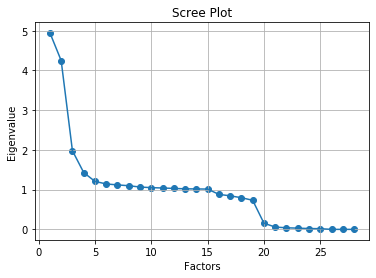

In [102]:
from factor_analyzer.analyze import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all, kmo_model = calculate_kmo(inputs)

# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(rotation=None)
fa.fit(inputs, 28)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

# Create scree plot using matplotlib
plt.scatter(range(1,inputs.shape[1]+1),ev)
plt.plot(range(1,inputs.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

<h2>Principle Component Analysis and Dimensionality reduction</h2>
<p>carried out setting number of componenets n = 4 following the scree plot generated above</p>

In [103]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)

principalComponents = pca.fit_transform(inputs)
principalDf = pd.DataFrame(data = principalComponents
             ,columns = ['pc1', 'pc2', 'pc3', 'pc4'])
principalDf.head()  


,pc1,pc2,pc3,pc4
0,-3.904799,1.702100,-0.178668,-1.087324
1,-5.064170,4.175655,-0.388953,-0.528519
2,-4.837566,4.409966,0.128542,0.635226
3,-4.960981,4.275794,-0.220666,0.137229
4,-6.122440,2.260404,-0.155942,-0.574292


<h3>K-means Clustering</h3>

<bound method Visualizer.poof of KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1dd803b4e0>,
                 k=None, metric=None, model=None, timings=True)>

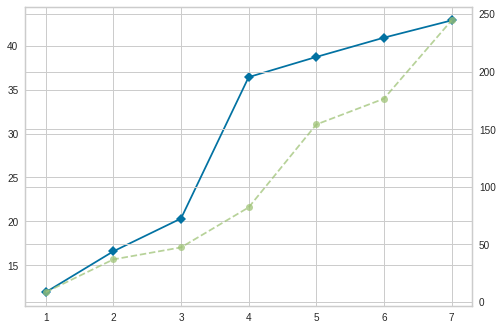

In [106]:
# estimate optimal k value using elbow plot
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,8))
visualizer.fit(principalDf)
visualizer.poof

In [107]:
kmeans = KMeans(n_clusters=4)
flight_clusters = kmeans.fit(principalDf)
flight_clusters.cluster_centers_

array([[ 8.51647792e-02,  3.70877514e+00, -2.62660210e-01,
        -6.98800821e-02],
       [-2.02934566e+00, -6.47965107e-01, -4.01409885e-02,
        -1.11678407e-03],
       [ 1.93429048e+00, -7.58011395e-01, -3.30704089e-01,
         4.76564658e-02],
       [ 1.49577486e+00,  5.69790709e-02,  5.33302778e+00,
        -2.21894548e-01]])

In [108]:
inputs['labels'] = flight_clusters.fit_predict(principalDf)
flights_merged = pd.concat([flights, inputs['labels']], axis = 1)
flights_merged.head()

,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,...,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DATE,ORIGIN_STATE,DESTINATION_STATE,labels
0,4.0,Alaska Airlines Inc.,ANC,SEA,5.0,2354.0,-11.0,21.0,15.0,205.0,...,1448.0,404.0,4.0,430.0,408.0,-22.0,2015-01-01,Alaska,Washington,1.0
1,4.0,American Airlines Inc.,LAX,PBI,10.0,2.0,-8.0,12.0,14.0,280.0,...,2330.0,737.0,4.0,750.0,741.0,-9.0,2015-01-01,California,Florida,2.0
2,4.0,US Airways Inc.,SFO,CLT,20.0,18.0,-2.0,16.0,34.0,286.0,...,2296.0,800.0,11.0,806.0,811.0,5.0,2015-01-01,California,North Carolina,2.0
3,4.0,American Airlines Inc.,LAX,MIA,20.0,15.0,-5.0,15.0,30.0,285.0,...,2342.0,748.0,8.0,805.0,756.0,-9.0,2015-01-01,California,Florida,2.0
4,4.0,Alaska Airlines Inc.,SEA,ANC,25.0,24.0,-1.0,11.0,35.0,235.0,...,1448.0,254.0,5.0,320.0,259.0,-21.0,2015-01-01,Washington,Alaska,1.0


In [110]:
# flights per cluster
flights_merged['labels'].value_counts()

1.0    2358811
0.0    2277696
2.0     875191
3.0     202310
Name: labels, dtype: int64

<p>2nd cluster contains most flights</p>